<a href="https://colab.research.google.com/github/aakaashvp/rnn-stock-price-prediction/blob/main/Copy_of_Ex05_StockPricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from keras import layers
from keras.models import Sequential

In [32]:
dataset_train = pd.read_csv('trainset.csv')


In [33]:
dataset_train.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [34]:
dataset_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,357.385559,361.151062,355.959839,359.288177,359.288177,5115500
1,2013-01-03,360.122742,363.600128,358.031342,359.496826,359.496826,4666500
2,2013-01-04,362.313507,368.339294,361.488861,366.600616,366.600616,5562800
3,2013-01-07,365.348755,367.301056,362.929504,365.001007,365.001007,3332900
4,2013-01-08,365.393463,365.771027,359.874359,364.280701,364.280701,3373900


In [35]:
train_set = dataset_train.iloc[:,1:2].values

In [36]:
type(train_set)

numpy.ndarray

In [37]:
train_set.shape

(1259, 1)

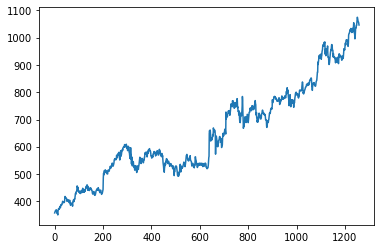

In [38]:
plt.plot(np.arange(0,1259),train_set)

In [39]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(train_set)

In [40]:
training_set_scaled.shape

(1259, 1)

In [41]:
X_train_array = []
y_train_array = []
for i in range(60, 1259):
  X_train_array.append(training_set_scaled[i-60:i,0])
  y_train_array.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train_array), np.array(y_train_array)
X_train1 = X_train.reshape((X_train.shape[0], X_train.shape[1],1))


In [42]:
X_train.shape

(1199, 60)

In [43]:
length = 60
n_features = 1

In [44]:
model = Sequential()
model.add(layers.SimpleRNN(10,input_shape=(60,1)))
model.add(layers.Dense(1))

In [45]:
model.compile(optimizer='adam', loss='mse')

In [46]:
model.fit(X_train1,y_train,epochs=100, batch_size=10)

Epoch 1/100
120/120 [==============================] - 2s 10ms/step - loss: 0.0018
Epoch 2/100
120/120 [==============================] - 1s 9ms/step - loss: 3.9601e-04
Epoch 3/100
120/120 [==============================] - 1s 9ms/step - loss: 3.0729e-04
Epoch 4/100
120/120 [==============================] - 1s 9ms/step - loss: 2.6864e-04
Epoch 5/100
120/120 [==============================] - 1s 9ms/step - loss: 2.5361e-04
Epoch 6/100
120/120 [==============================] - 1s 9ms/step - loss: 2.4671e-04
Epoch 7/100
120/120 [==============================] - 1s 8ms/step - loss: 2.3063e-04
Epoch 8/100
120/120 [==============================] - 1s 8ms/step - loss: 2.2397e-04
Epoch 9/100
120/120 [==============================] - 1s 9ms/step - loss: 2.3138e-04
Epoch 10/100
120/120 [==============================] - 1s 8ms/step - loss: 2.2101e-04
Epoch 11/100
120/120 [==============================] - 1s 9ms/step - loss: 2.0878e-04
Epoch 12/100
120/120 [==============================] -

In [47]:
dataset_test = pd.read_csv('testset.csv')

In [48]:
test_set = dataset_test.iloc[:,1:2].values

In [49]:
test_set.shape

(125, 1)

In [50]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)

In [51]:
inputs = dataset_total.values
inputs = inputs.reshape(-1,1)
inputs_scaled=sc.transform(inputs)
X_test = []
for i in range(60,1384):
  X_test.append(inputs_scaled[i-60:i,0])
  
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [52]:
X_test.shape

(1324, 60, 1)

In [53]:
predicted_stock_price_scaled = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price_scaled)

42/42 [==============================] - 0s 4ms/step


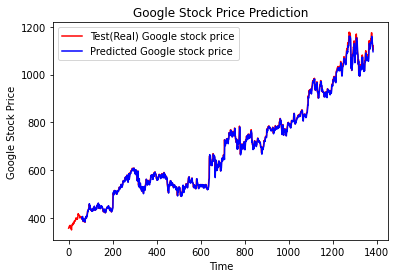

In [54]:
plt.plot(np.arange(0,1384),inputs, color='red', label = 'Test(Real) Google stock price')
plt.plot(np.arange(60,1384),predicted_stock_price, color='blue', label = 'Predicted Google stock price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
